<a href="https://colab.research.google.com/github/deepakboharachhetri/AI_lab/blob/main/Vacuum_cleaner_using_different_agent_type.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the number of rows of the cleaner5
Enter the number of rows of the cleaner:5


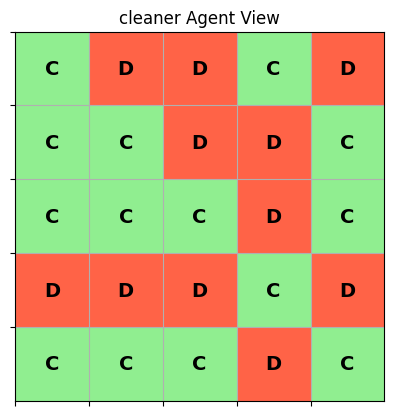

Character Matrix:
C D D C D 

C C D D C 

C C C D C 

D D D C D 

C C C D C 

already clean... 0, 0
cleaning... 0, 1)
cleaning... 0, 2)
already clean... 0, 3
cleaning... 0, 4)
already clean... 1, 0
already clean... 1, 1
cleaning... 1, 2)
cleaning... 1, 3)
already clean... 1, 4
already clean... 2, 0
already clean... 2, 1
already clean... 2, 2
cleaning... 2, 3)
already clean... 2, 4
cleaning... 3, 0)
cleaning... 3, 1)
cleaning... 3, 2)
already clean... 3, 3
cleaning... 3, 4)
already clean... 4, 0
already clean... 4, 1
already clean... 4, 2
cleaning... 4, 3)
already clean... 4, 4
After cleaning:
C C C C C 

C C C C C 

C C C C C 

C C C C C 

C C C C C 



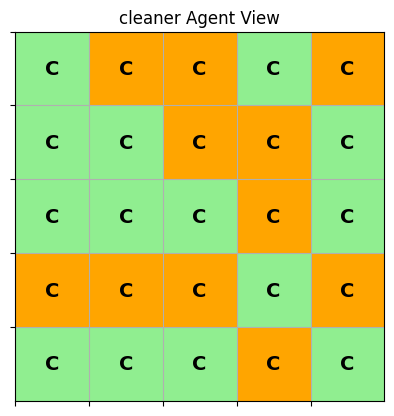

In [5]:
#vacuum cleaner :Reflex agent
import numpy as np
import matplotlib.pyplot as plt

def fill_matrix(char_matrix,row,column):
    """
    Fill the character matrix with5
     characters from the input matrix.
    """
    for i in range(row):
        for j in range(column):
            ran_values=np.random.rand()
            if ran_values < 0.5:
                char_matrix[i, j] = 'C'
            else:
                char_matrix[i, j] = 'D'

def get_color(i,j,val,cleaned_dirty_position):
    if(i,j) in cleaned_dirty_position:
      return 'orange'
    return 'lightgreen' if val =='C' else 'tomato'
def display(char_matrix,rows,cols,cleaned_dirty_position,title="cleaner Agent View"):
  """ Visualize cleaner agent into color boxes"""
  fig,ax=plt.subplots()
  ax.set_title(title)
  ax.imshow([[0]*cols for _ in range(rows)], cmap='gray', vmin=0, vmax=1)
  for i in range(rows):
      for j in range(cols):
          color = get_color(i, j, char_matrix[i, j],cleaned_dirty_position)
          rect = plt.Rectangle((j, i), 1, 1, facecolor=color)
          ax.add_patch(rect)
          ax.text(j + 0.5, i + 0.5, char_matrix[i, j], ha='center', va='center', fontsize=14, weight='bold')

  ax.set_xticks(np.arange(cols))
  ax.set_yticks(np.arange(rows))
  ax.set_xticklabels([])
  ax.set_yticklabels([])
  ax.set_xlim([0, cols])
  ax.set_ylim([rows, 0])
  ax.set_aspect('equal')
  plt.grid(True)
  plt.show()
def print_matrix(char_matrix,row,column):
    """
    Print the character matrix.
    """
    for i in range(row):
        for j in range(column):
            print(char_matrix[i, j], end=' ')
        print('\n')



def clener_agent(char_matrix,row,column,cleaned_dirty_position):
    """
    Simulate a vacuum cleaner agent that cleans the character matrix.
    """

    for i in range(row):
        for j in range(column):# Clean the character 'C' to 'D'
            if char_matrix[i, j] == 'D':
                char_matrix[i, j] = 'C'
                cleaned_dirty_position.append((i,j))
                # print(cleaned_dirty_position)
                print(f"cleaning... {i}, {j})")
            else:
              print(f"already clean... {i}, {j}")


def main():
    # Create an empty 4x4 matrix for characters
    row=int(input("Enter the number of rows of the cleaner"))
    column=int(input("Enter the number of rows of the cleaner:"))
    cleaned_dirty_position=[]
    char_matrix = np.empty((row, column), dtype=str)
    fill_matrix(char_matrix,row,column)
    display(char_matrix,row,column,cleaned_dirty_position)
    print("Character Matrix:")
    print_matrix(char_matrix,row,column)
    clener_agent(char_matrix,row,column,cleaned_dirty_position)
    print("After cleaning:")
    print_matrix(char_matrix,row,column)
    # print(cleaned_dirty_position)
    display(char_matrix,row,column,cleaned_dirty_position)

main()


Initial Character Matrix:
D C D D 
C D D D 
C D C D 
C C C C 


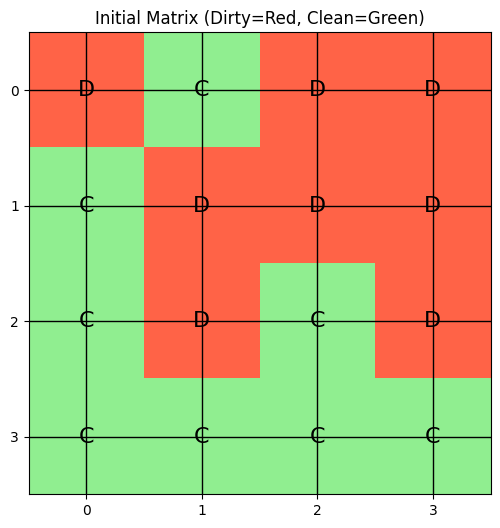


Starting cleaning from position (2, 2):


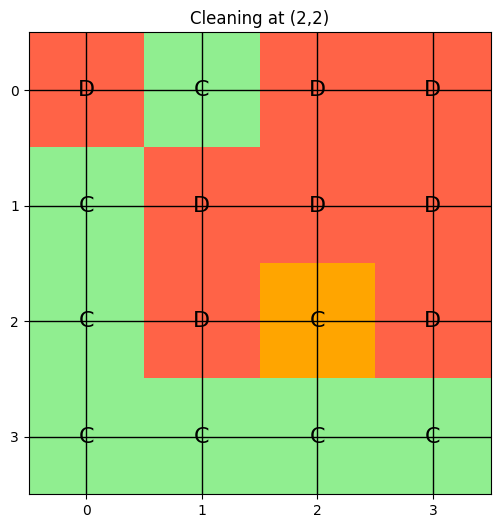

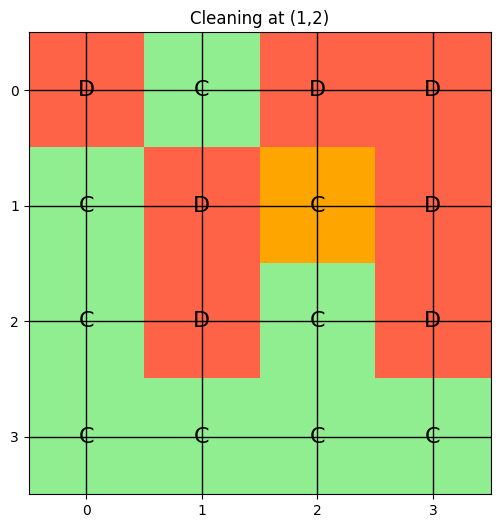

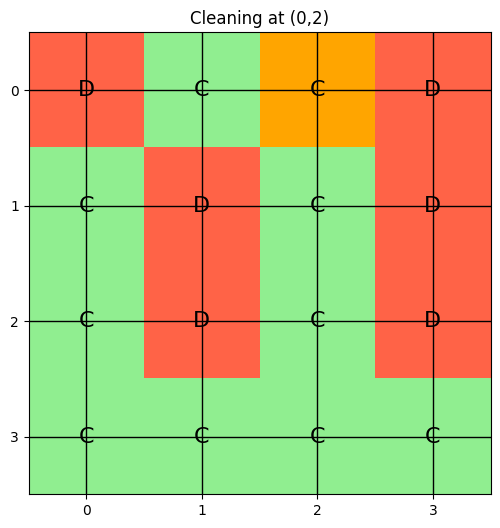

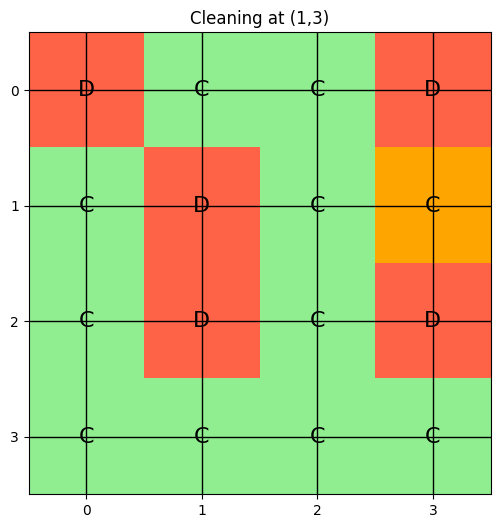

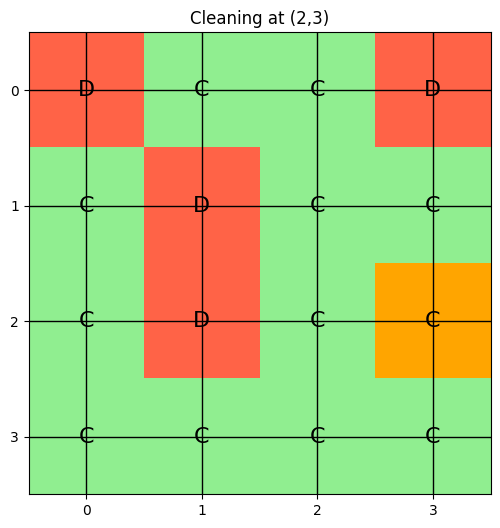


Checking and cleaning all remaining dirty cells iteratively:


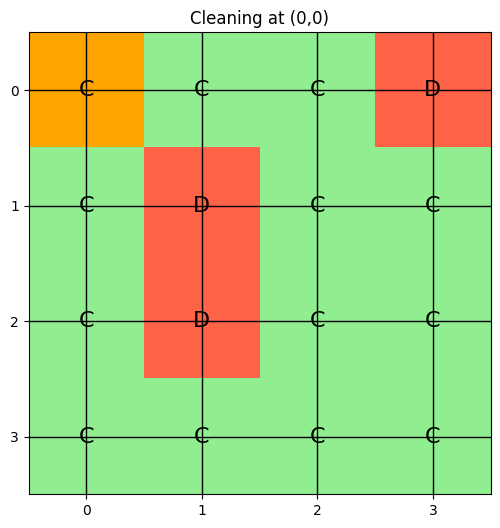

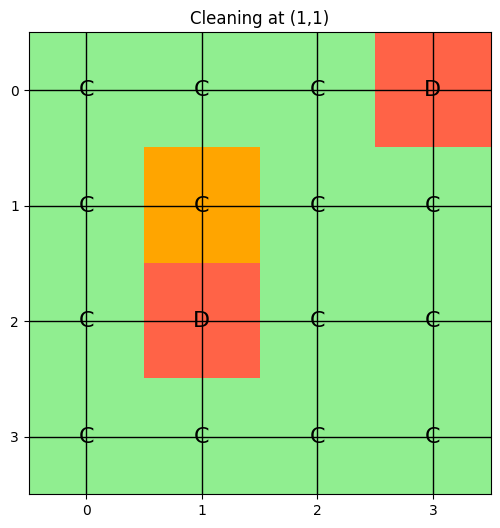

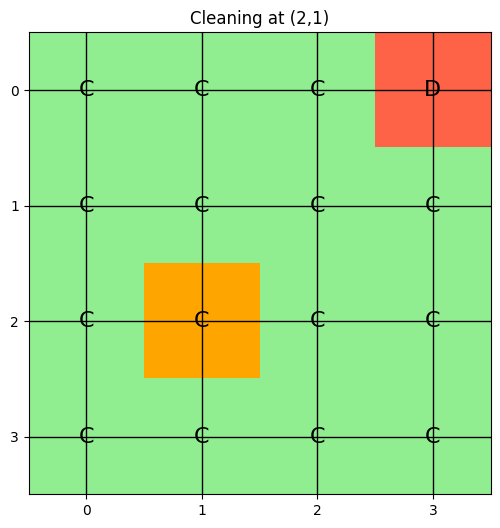

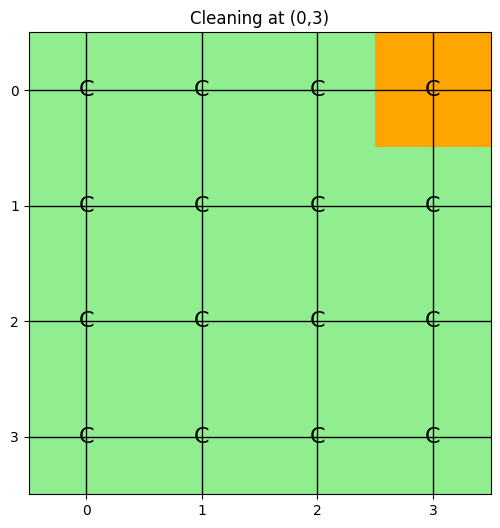


Final Character Matrix after cleaning:
C C C C 
C C C C 
C C C C 
C C C C 


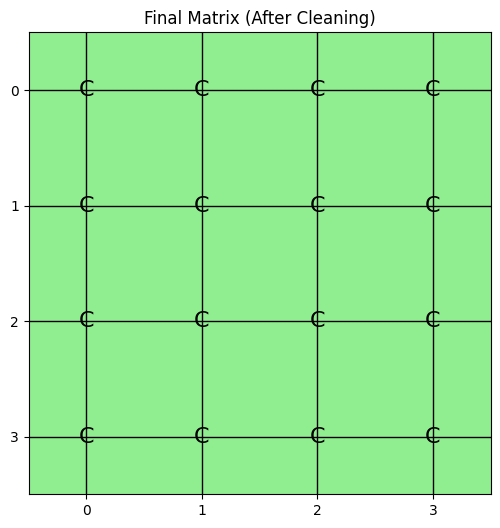

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import time

visited = set()

def fill_matrix(char_matrix):
    """
    Fill the character matrix with 'C' (clean) or 'D' (dirty) randomly.
    """
    for i in range(len(char_matrix)):
        for j in range(len(char_matrix[0])):
            ran_value = np.random.rand()
            char_matrix[i, j] = 'C' if ran_value < 0.5 else 'D'

def print_matrix(char_matrix):
    """
    Print the character matrix.
    """
    for i in range(len(char_matrix)):
        for j in range(len(char_matrix[0])):
            print(char_matrix[i, j], end=' ')
        print()

def plot_matrix(char_matrix, current_pos=None, title="Matrix State"):
    """
    Visualize the matrix using matplotlib.
    Dirty cells ('D') are red, clean cells ('C') green.
    The current cleaning position is highlighted orange.
    """
    size_x, size_y = char_matrix.shape
    color_map = np.zeros((size_x, size_y))
    for i in range(size_x):
        for j in range(size_y):
            if current_pos == (i, j):
                color_map[i, j] = 2  # Current cleaning cell - special color
            else:
                color_map[i, j] = 1 if char_matrix[i, j] == 'D' else 0

    # Define custom colors: 0=green(clean), 1=red(dirty), 2=orange(current)
    from matplotlib.colors import ListedColormap
    cmap = ListedColormap(['lightgreen', 'tomato', 'orange'])

    plt.figure(figsize=(6,6))
    plt.imshow(color_map, cmap=cmap, vmin=0, vmax=2)
    plt.title(title)
    plt.xticks(range(size_y))
    plt.yticks(range(size_x))
    plt.grid(True, which='both', color='black', linewidth=1)
    plt.gca().set_xticklabels(range(size_y))
    plt.gca().set_yticklabels(range(size_x))
    for i in range(size_x):
        for j in range(size_y):
            plt.text(j, i, char_matrix[i, j], ha='center', va='center', color='black', fontsize=16)
    plt.show()

def predict_next(char_matrix, i, j):
    directions = [
        (1, 0),   # Down
        (-1, 0),  # Up
        (0, 1),   # Right
        (0, -1),  # Left
        (1, 1),   # Down-Right
        (-1, -1), # Up-Left
        (1, -1),  # Down-Left
        (-1, 1),  # Up-Right
    ]

    rows = len(char_matrix)
    cols = len(char_matrix[0])
    count = 0
    address = {}

    for idx, (dx, dy) in enumerate(directions):
        ni, nj = i + dx, j + dy
        if 0 <= ni < rows and 0 <= nj < cols:
            if char_matrix[ni][nj] == 'D':
                count += 1
                address[idx] = (ni, nj)

    return count, address

def optimize_next(char_matrix, i, j):
    rows = len(char_matrix)
    cols = len(char_matrix[0])
    if i < 0 or i >= rows or j < 0 or j >= cols:
        return {}

    if char_matrix[i][j] == 'D':
        char_matrix[i][j] = 'C'  # Clean current cell
    visited.add((i, j))  # Mark as visited

    count, address = predict_next(char_matrix, i, j)
    counter = {}

    if count > 0:
        for idx, pos in address.items():
            ni, nj = pos
            if (ni, nj) not in visited:
                cnt, addr = predict_next(char_matrix, ni, nj)
                counter[(ni, nj)] = (cnt, addr)
    return counter

def cleaner(char_matrix, i, j):
    if (i, j) in visited:
        return
    visited.add((i, j))

    optimize_next(char_matrix, i, j)
    plot_matrix(char_matrix, current_pos=(i, j), title=f"Cleaning at ({i},{j})")
    time.sleep(0.5)

    counter = optimize_next(char_matrix, i, j)
    if not counter:
        return

    while counter:
        max_key = max(counter, key=lambda k: counter[k][0])
        ni, nj = max_key
        if (ni, nj) in visited:
            del counter[max_key]
            if not counter:
                return
            continue
        optimize_next(char_matrix, ni, nj)
        visited.add((ni, nj))
        plot_matrix(char_matrix, current_pos=(ni, nj), title=f"Cleaning at ({ni},{nj})")
        time.sleep(0.5)
        counter = optimize_next(char_matrix, ni, nj)

def check_all_cleaned(char_matrix):
    while True:
        dirty_found = False
        for i in range(len(char_matrix)):
            for j in range(len(char_matrix[0])):
                if char_matrix[i][j] == 'D' and (i, j) not in visited:
                    cleaner(char_matrix, i, j)
                    dirty_found = True
        if not dirty_found:
            break

def main():
    global visited
    visited.clear()

    size = 4
    char_matrix = np.empty((size, size), dtype=str)
    fill_matrix(char_matrix)

    print("Initial Character Matrix:")
    print_matrix(char_matrix)
    plot_matrix(char_matrix, title="Initial Matrix (Dirty=Red, Clean=Green)")

    print("\nStarting cleaning from position (2, 2):")
    cleaner(char_matrix, 2, 2)

    print("\nChecking and cleaning all remaining dirty cells iteratively:")
    check_all_cleaned(char_matrix)

    print("\nFinal Character Matrix after cleaning:")
    print_matrix(char_matrix)
    plot_matrix(char_matrix, title="Final Matrix (After Cleaning)")

if __name__ == "__main__":
    main()


Initial matrix:
D D C C
C D C D
C C C C
D D C D


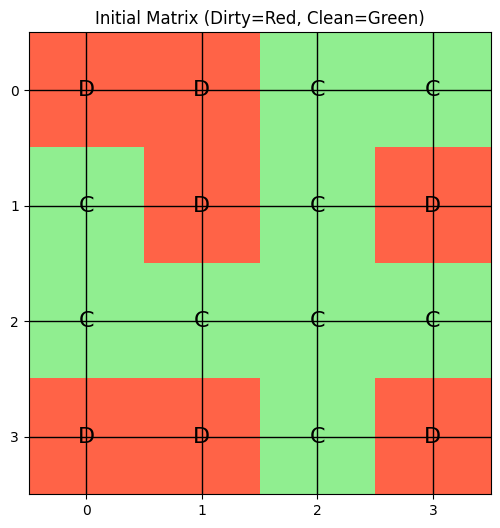


Starting utility-based cleaning from (2, 2):
Cleaning cell (3, 1)


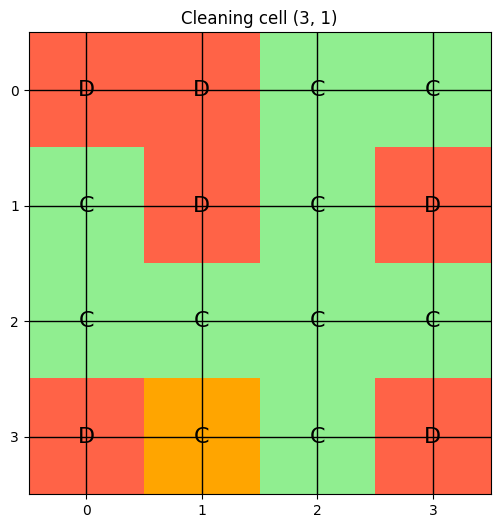

Cleaning cell (1, 1)


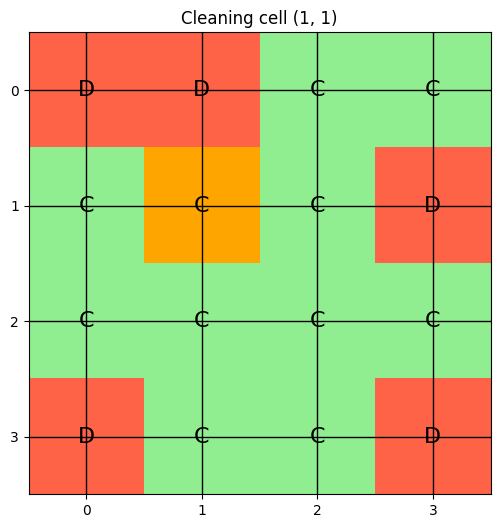

Cleaning cell (0, 1)


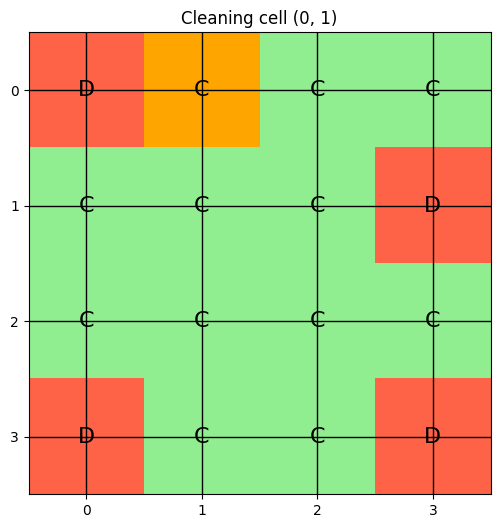

Cleaning cell (0, 0)


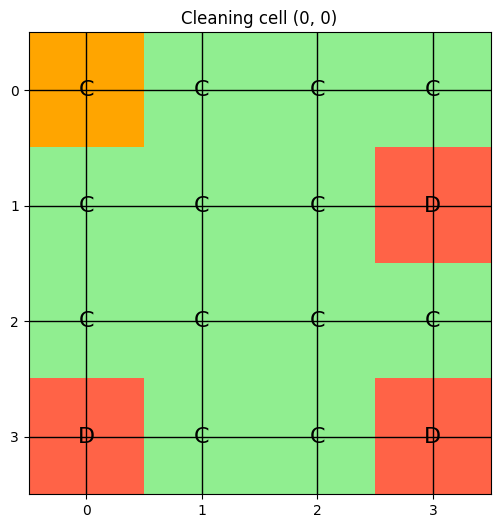

Cleaning cell (3, 0)


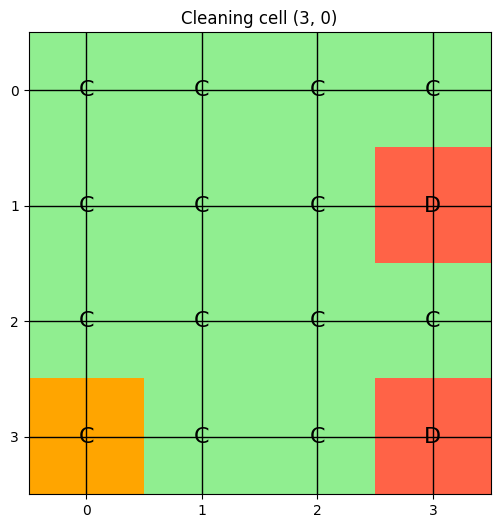

Cleaning cell (1, 3)


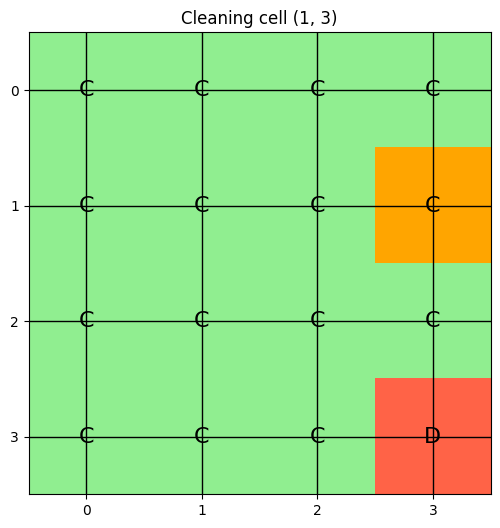

Cleaning cell (3, 3)


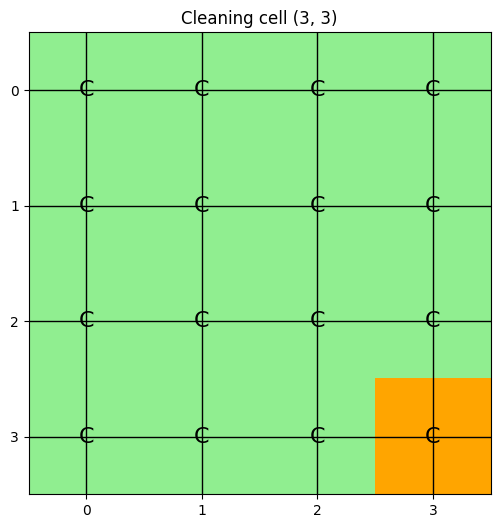

All cells cleaned.

Final matrix after cleaning:
C C C C
C C C C
C C C C
C C C C


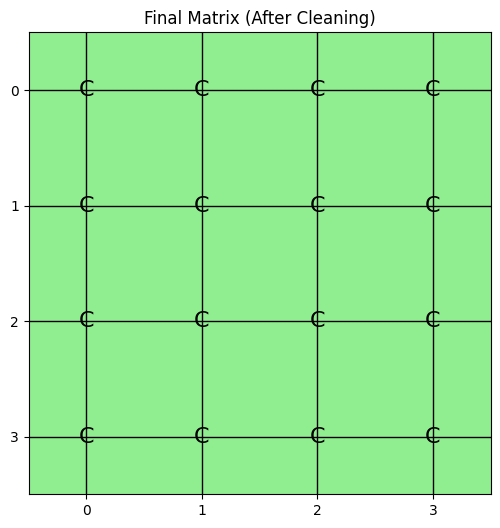

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import time

visited = set()

def fill_matrix(char_matrix):
    for i in range(len(char_matrix)):
        for j in range(len(char_matrix[0])):
            char_matrix[i, j] = 'C' if np.random.rand() < 0.5 else 'D'

def print_matrix(char_matrix):
    for row in char_matrix:
        print(' '.join(row))

def plot_matrix(char_matrix, current_pos=None, title="Matrix State"):
    size_x, size_y = char_matrix.shape
    color_map = np.zeros((size_x, size_y))
    for i in range(size_x):
        for j in range(size_y):
            if current_pos == (i, j):
                color_map[i, j] = 2  # current cell orange
            else:
                color_map[i, j] = 1 if char_matrix[i, j] == 'D' else 0

    from matplotlib.colors import ListedColormap
    cmap = ListedColormap(['lightgreen', 'tomato', 'orange'])

    plt.figure(figsize=(6,6))
    plt.imshow(color_map, cmap=cmap, vmin=0, vmax=2)
    plt.title(title)
    plt.xticks(range(size_y))
    plt.yticks(range(size_x))
    plt.grid(True, which='both', color='black', linewidth=1)
    plt.gca().set_xticklabels(range(size_y))
    plt.gca().set_yticklabels(range(size_x))
    for i in range(size_x):
        for j in range(size_y):
            plt.text(j, i, char_matrix[i, j], ha='center', va='center', fontsize=16)
    plt.show()

def utility(char_matrix, current_pos, candidate_pos):
    """
    Compute utility of moving to candidate_pos from current_pos.
    Utility = (number of dirty neighbors + 1 if candidate is dirty) / distance
    Higher utility preferred.
    """
    rows, cols = char_matrix.shape
    i, j = candidate_pos

    # Count dirty neighbors
    directions = [(1,0), (-1,0), (0,1), (0,-1)]
    dirty_neighbors = 0
    for dx, dy in directions:
        ni, nj = i+dx, j+dy
        if 0 <= ni < rows and 0 <= nj < cols:
            if char_matrix[ni, nj] == 'D':
                dirty_neighbors +=1

    # Check if candidate cell itself is dirty
    cell_dirty_bonus = 1 if char_matrix[i, j] == 'D' else 0

    # Distance from current_pos (Manhattan distance)
    dist = abs(current_pos[0] - i) + abs(current_pos[1] - j)
    if dist == 0:
        dist = 0.1  # avoid division by zero

    # Calculate utility
    util = (dirty_neighbors + cell_dirty_bonus) / dist
    return util

def get_possible_moves(char_matrix, current_pos):
    rows, cols = char_matrix.shape
    i, j = current_pos
    moves = []

    for dx, dy in [(1,0), (-1,0), (0,1), (0,-1)]:
        ni, nj = i+dx, j+dy
        if 0 <= ni < rows and 0 <= nj < cols:
            moves.append((ni,nj))
    return moves

def utility_based_cleaner(char_matrix, start_pos):
    current_pos = start_pos
    rows, cols = char_matrix.shape
    steps = 0

    while True:
        i, j = current_pos
        if char_matrix[i, j] == 'D':
            char_matrix[i, j] = 'C'  # Clean cell
            print(f"Cleaning cell {current_pos}")
            plot_matrix(char_matrix, current_pos, f"Cleaning cell {current_pos}")
            time.sleep(0.5)

        visited.add(current_pos)
        # Get possible moves and calculate utility
        moves = get_possible_moves(char_matrix, current_pos)
        moves = [m for m in moves if m not in visited]  # avoid revisiting same cell too often

        if not moves:
            # No more moves possible, check if dirty cells remain anywhere
            dirty_cells = [(x,y) for x in range(rows) for y in range(cols) if char_matrix[x,y]=='D']
            if not dirty_cells:
                print("All cells cleaned.")
                break
            # If dirty cells remain but no moves, reset visited to allow revisiting
            visited.clear()
            continue

        # Choose move with highest utility
        utilities = [utility(char_matrix, current_pos, m) for m in moves]
        max_util_index = np.argmax(utilities)
        next_pos = moves[max_util_index]

        # Move to next cell
        current_pos = next_pos
        steps += 1
        if steps > rows * cols * 10:  # safety limit to prevent infinite loop
            print("Stopping after too many steps.")
            break

def main():
    global visited
    visited.clear()
    size = 4
    char_matrix = np.empty((size, size), dtype=str)
    fill_matrix(char_matrix)

    print("Initial matrix:")
    print_matrix(char_matrix)
    plot_matrix(char_matrix, title="Initial Matrix (Dirty=Red, Clean=Green)")

    start_pos = (2, 2)
    print(f"\nStarting utility-based cleaning from {start_pos}:")
    utility_based_cleaner(char_matrix, start_pos)

    print("\nFinal matrix after cleaning:")
    print_matrix(char_matrix)
    plot_matrix(char_matrix, title="Final Matrix (After Cleaning)")

if __name__ == "__main__":
    main()
